In [16]:
%matplotlib inline 

import pandas as pd
import numpy as np
from sklearn import cluster
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn import cluster, datasets
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
matplotlib.style.use('ggplot')

In [17]:
df = pd.read_csv("../../assets/datasets/mtcars.csv")

In [25]:
df.head()

,Car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,car_numeric
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,0
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,1
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,2
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,3
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,4


In [26]:
car = df['Car']

Create a column with numeric values for the cars

In [27]:
cars = list(df['Car'].unique())
cars

['Mazda RX4',
 'Mazda RX4 Wag',
 'Datsun 710',
 'Hornet 4 Drive',
 'Hornet Sportabout',
 'Valiant',
 'Duster 360',
 'Merc 240D',
 'Merc 230',
 'Merc 280',
 'Merc 280C',
 'Merc 450SE',
 'Merc 450SL',
 'Merc 450SLC',
 'Cadillac Fleetwood',
 'Lincoln Continental',
 'Chrysler Imperial',
 'Fiat 128',
 'Honda Civic',
 'Toyota Corolla',
 'Toyota Corona',
 'Dodge Challenger',
 'AMC Javelin',
 'Camaro Z28',
 'Pontiac Firebird',
 'Fiat X1-9',
 'Porsche 914-2',
 'Lotus Europa',
 'Ford Pantera L',
 'Ferrari Dino',
 'Maserati Bora',
 'Volvo 142E']

In [28]:
car_nums = {car:num for num, car in enumerate(cars)}
car_nums

{'AMC Javelin': 22,
 'Cadillac Fleetwood': 14,
 'Camaro Z28': 23,
 'Chrysler Imperial': 16,
 'Datsun 710': 2,
 'Dodge Challenger': 21,
 'Duster 360': 6,
 'Ferrari Dino': 29,
 'Fiat 128': 17,
 'Fiat X1-9': 25,
 'Ford Pantera L': 28,
 'Honda Civic': 18,
 'Hornet 4 Drive': 3,
 'Hornet Sportabout': 4,
 'Lincoln Continental': 15,
 'Lotus Europa': 27,
 'Maserati Bora': 30,
 'Mazda RX4': 0,
 'Mazda RX4 Wag': 1,
 'Merc 230': 8,
 'Merc 240D': 7,
 'Merc 280': 9,
 'Merc 280C': 10,
 'Merc 450SE': 11,
 'Merc 450SL': 12,
 'Merc 450SLC': 13,
 'Pontiac Firebird': 24,
 'Porsche 914-2': 26,
 'Toyota Corolla': 19,
 'Toyota Corona': 20,
 'Valiant': 5,
 'Volvo 142E': 31}

In [31]:
df['car_numeric'] = df['Car'].apply(lambda x: car_nums[x])

In [32]:
df.head()

,Car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,car_numeric
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,0
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,1
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,2
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,3
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,4


Plot the Data (Can Plot for Various Combinations of Variables)

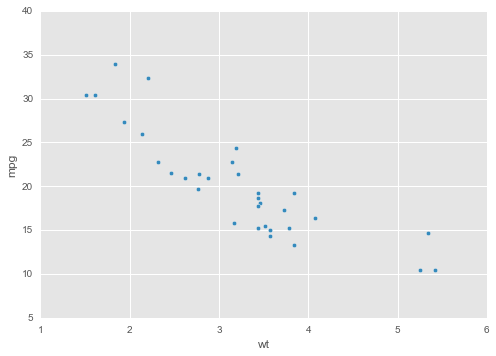

In [9]:
df.plot(kind='scatter',x='wt',y='mpg')
## Try this for multiple variable combinations

In [10]:
import seaborn as sns

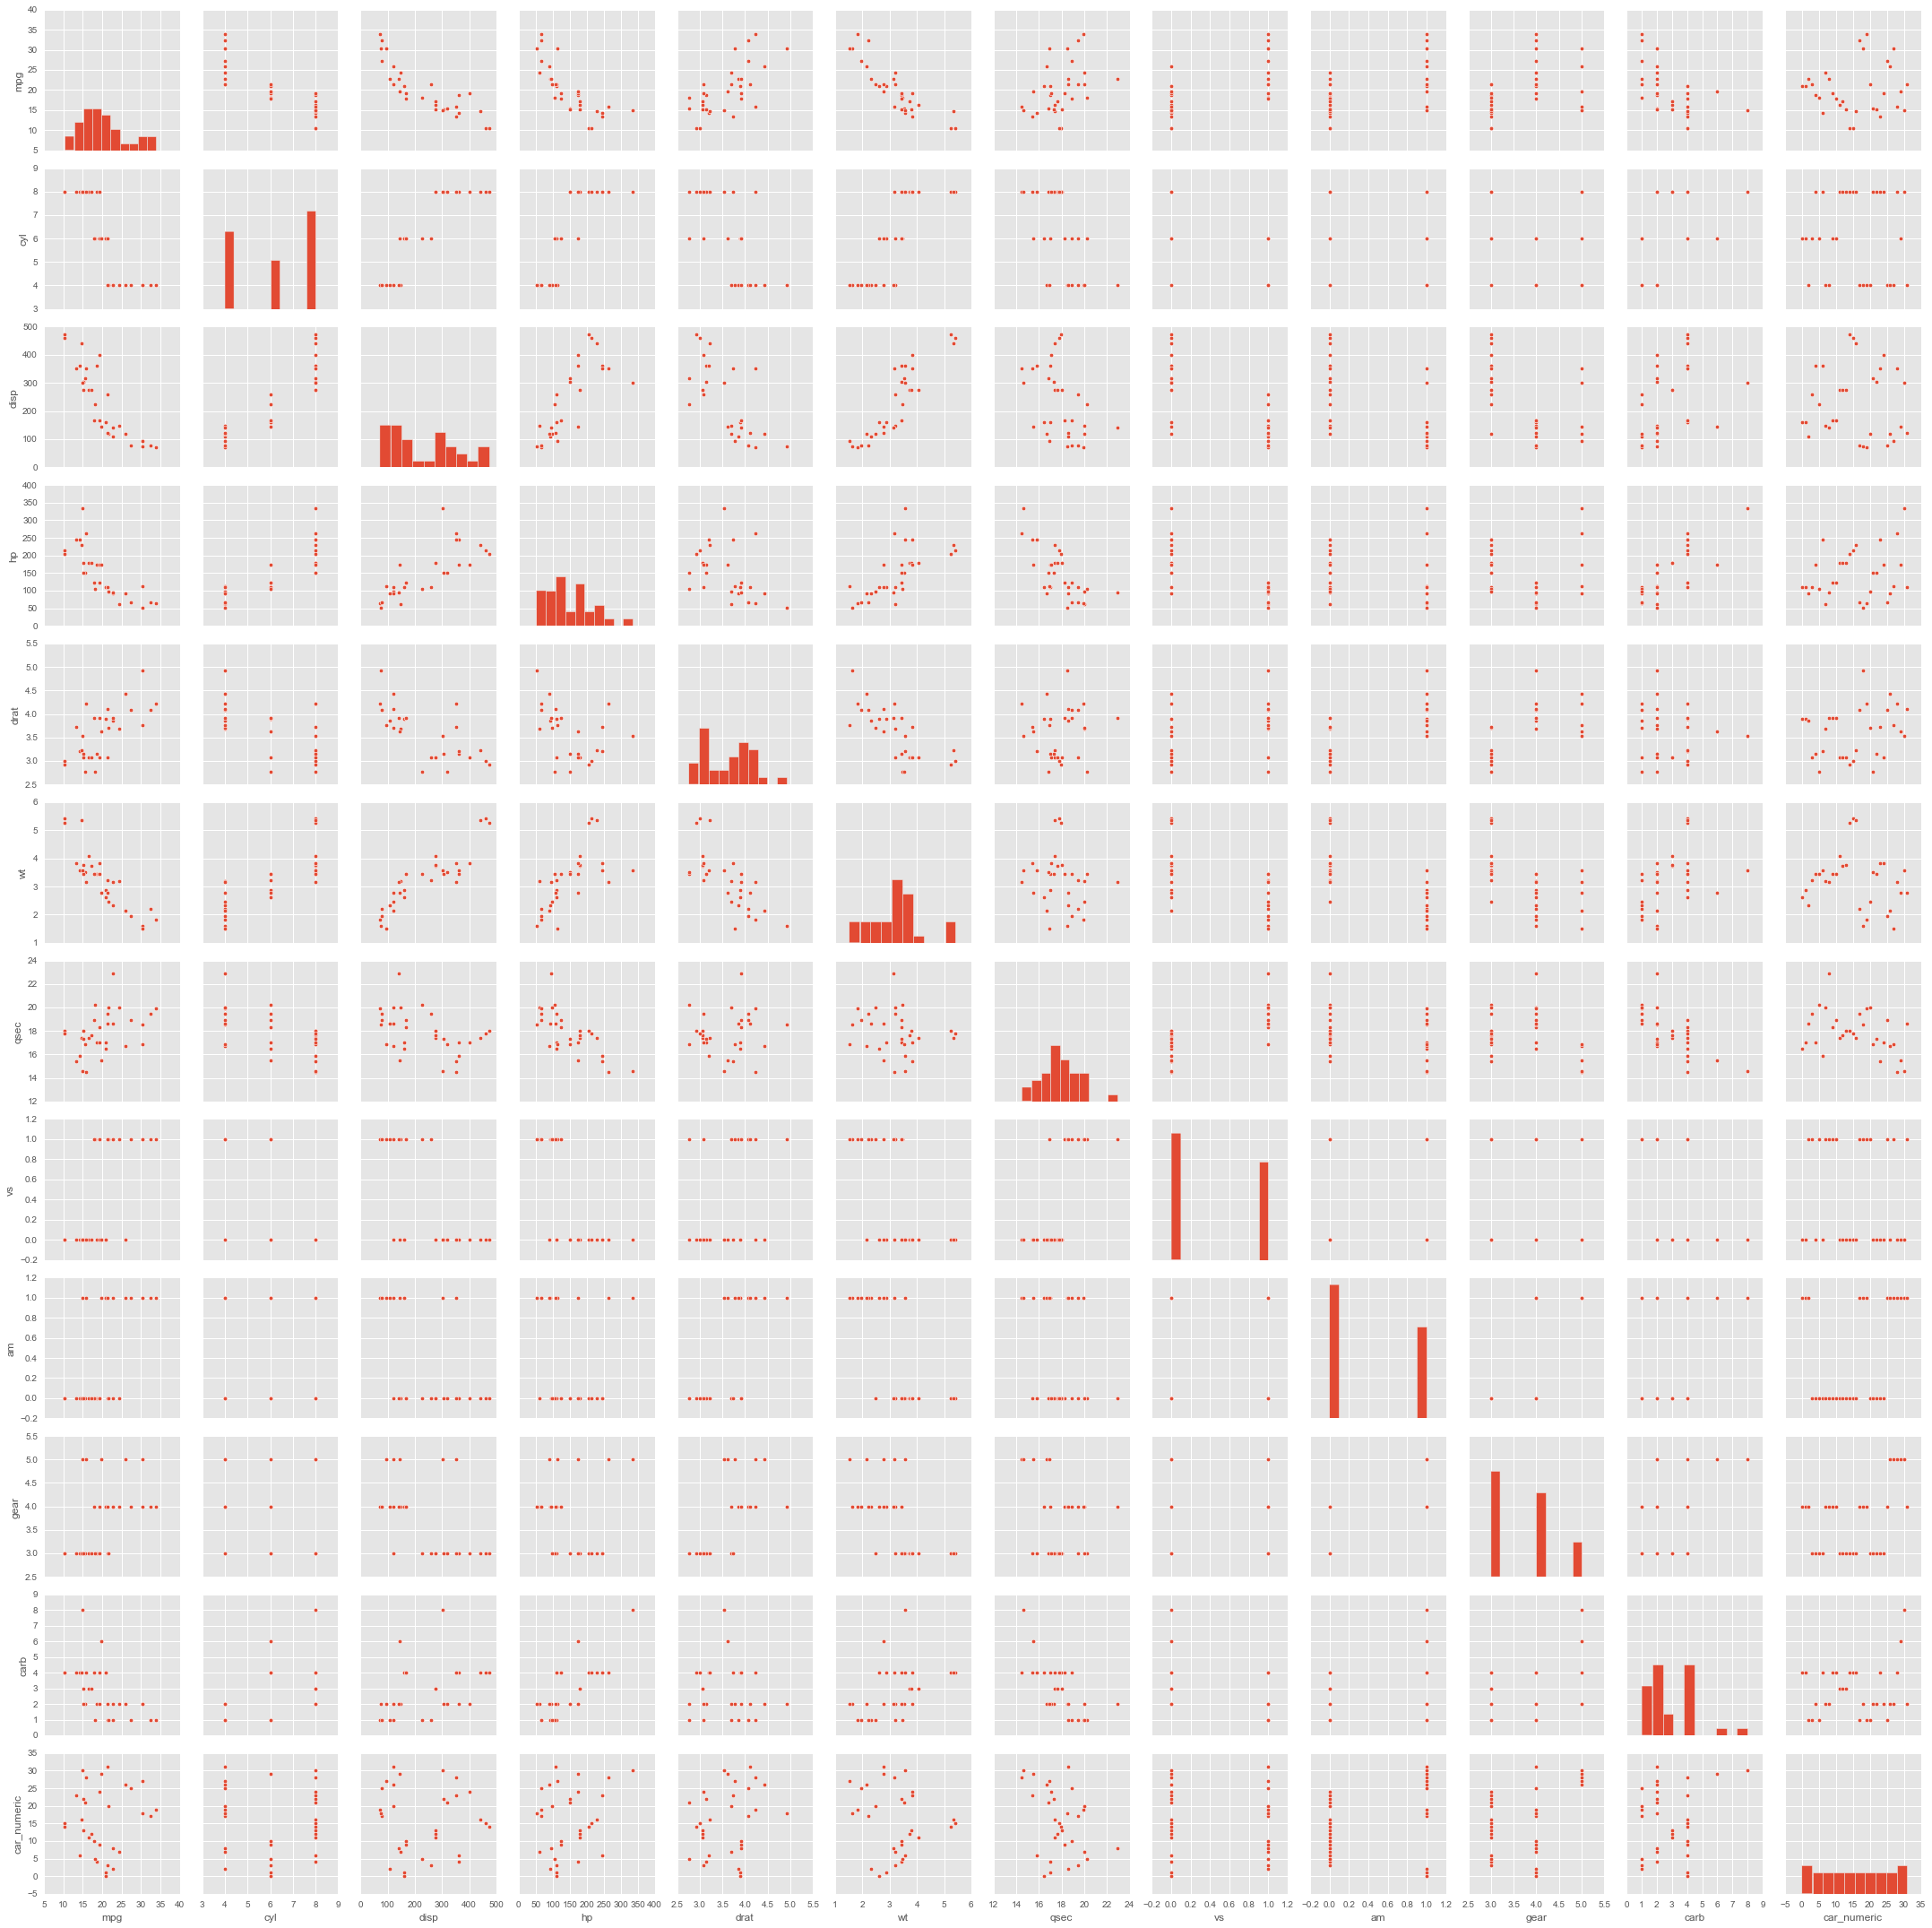

In [11]:
sns.pairplot(df)

Convert to Matrix and normalize your features

In [12]:
X = df.iloc[:,1:]

In [13]:
from sklearn import preprocessing

In [14]:
X_scaled = preprocessing.scale(X)
X_scaled[4]

array([-0.23442651,  1.0311213 ,  1.05977159,  0.41954967, -0.84856181,
        0.23129695, -0.47120178, -0.8819171 , -0.82717019, -0.94672926,
       -0.51108274, -1.24551983])

Cluster - Choose K based on your plots and variables chosen

In [15]:
s = []
i = []
for k in range(2, 10):
    kmeans = cluster.KMeans(n_clusters=k)
    kmeans.fit(X)
    labels = kmeans.labels_
    s_i = metrics.silhouette_score(X, labels, metric='euclidean')
    s.append(s_i)
    i.append(kmeans.inertia_)

Find the Silhoutte Score and plot

In [ ]:
f, (ax1, ax2) = plt.subplots(1,2)
ax1.plot(range(2,10), s)
ax1.set_title("Silouette Score")
ax1.set_xlabel("k")

ax2.plot(range(2,10), i)
ax2.set_title("Inertia")
ax2.set_xlabel("k")

sns.despine()

ValueError: x and y must have same first dimension

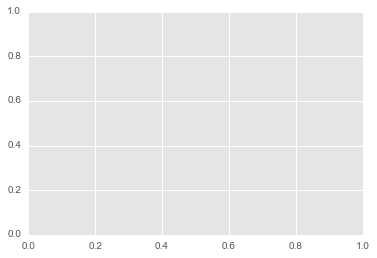

In [38]:
plt.plot(range(2,6), s)
plt.ylabel("Silouette")
plt.xlabel("k")

Finally, reassign your labels to the dataframe, and plot variables against each other according to color. Try this in both seaborn and matplotlib. 

What do you notice about your clusters?